## Observations and Insights 

In [70]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.

#number of mice
num_mice = mouse_data['Mouse ID'].nunique()
print(f"Unique Mice: {num_mice}")

#number of total recordings
num_recordings = mouse_data['Mouse ID'].count()
print(f"Total Recordings: {num_recordings}")

Unique Mice: 249
Total Recordings: 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = mouse_data[['Mouse ID','Timepoint']]
duplicated_mice = duplicated_mice[duplicated_mice.duplicated()]
mousedup = duplicated_mice.iloc[0,0]
print(f"Duplicate Mice ID: {mousedup}")
duplicated_mice


Duplicate Mice ID: g989


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_data.loc[mouse_data["Mouse ID"] == mousedup,:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = mouse_data[mouse_data['Mouse ID'] == "g989"].index
mouse_data.drop(indexNames,inplace=True)
clean_df = mouse_data.copy()
clean_df
#Dropped all recordings of the mouse id that was duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

#number of mice
num_mice = clean_df['Mouse ID'].nunique()
print(f"Unique Mice: {num_mice}")

#number of total recordings
num_recordings = clean_df['Mouse ID'].count()
print(f"Total Recordings: {num_recordings}")

Unique Mice: 248
Total Recordings: 1880


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen = clean_df['Drug Regimen'].value_counts()
drug_group = clean_df.groupby('Drug Regimen')
tum_ave=drug_group['Tumor Volume (mm3)'].mean()
tum_med=drug_group['Tumor Volume (mm3)'].median()
tum_var=drug_group['Tumor Volume (mm3)'].var()
tum_std=drug_group['Tumor Volume (mm3)'].std()
tum_sem=drug_group['Tumor Volume (mm3)'].sem()

sumframe = pd.DataFrame({"Mean":tum_ave,"Median":tum_med,"Variance":tum_var,"Standard Deviation":tum_std,"SEM":tum_sem})
sumframe

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group.head()
# Using the aggregation method, produce the same summary statistics in a single line
sum2frame = drug_group.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sum2frame

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

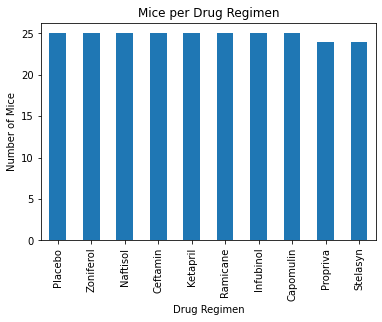

<Figure size 144x144 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_regimen = mouse_data.drop_duplicates(
  subset = ['Mouse ID', 'Drug Regimen'],
  keep = 'last')
drug_regimen = mice_regimen['Drug Regimen'].value_counts().to_frame()
drug_chart = drug_regimen.plot(kind="bar",width = .5)
plt.title("Mice per Drug Regimen")
plt.legend().remove()
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen", fontsize = 10)
plt.ylabel("Number of Mice", fontsize = 10)
plt.figure(figsize=(2,2))
plt.tight_layout()
plt.show()

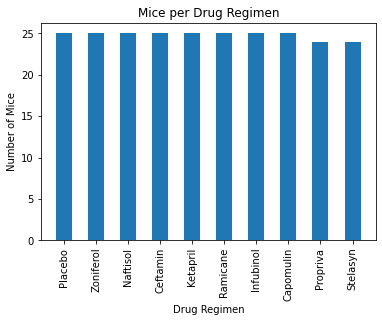

<Figure size 144x144 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis=np.arange(len(drug_regimen))
tick_location = [value for value in x_axis]
drug_regimen.index.values
plt.xticks(tick_location,drug_regimen.index.values,rotation=90)
plt.title("Mice per Drug Regimen")
plt.bar(x_axis,drug_regimen['Drug Regimen'],width = .5)
plt.xlabel("Drug Regimen", fontsize = 10)
plt.ylabel("Number of Mice", fontsize = 10)
plt.figure(figsize=(2,2))
plt.tight_layout()
plt.show()

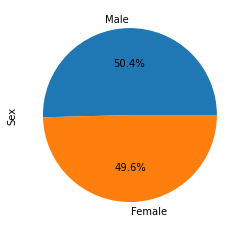

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = mouse_data.drop_duplicates(
  subset = ['Mouse ID', 'Sex'],
  keep = 'last')
sex_count = mice_sex['Sex'].value_counts()
sex_chart = sex_count.plot(kind="pie",autopct="%1.1f%%")

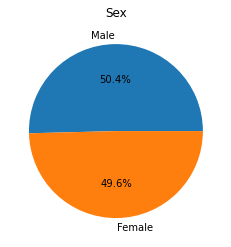

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=['Male','Female']
plt.pie(sex_count,labels=sex,autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = mouse_data.drop_duplicates(
  subset = ['Mouse ID'],
  keep = 'last').reset_index(drop = True)
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


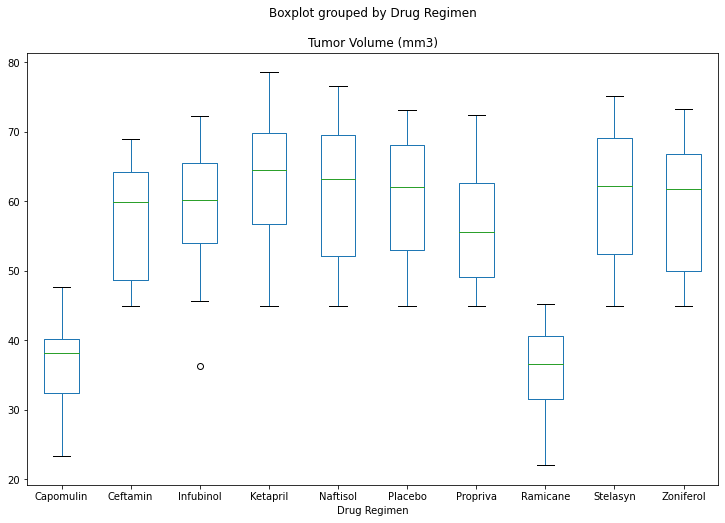

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last_df.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False,figsize=(12,8))

plt.show()

## Line and Scatter Plots

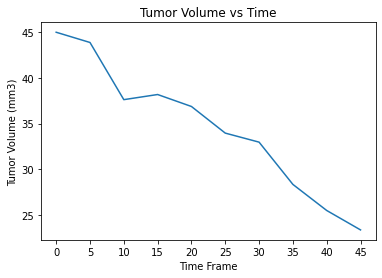

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "s185"
capo_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")&(clean_df["Mouse ID"] == mouse_id),:]
capo_df = capo_df.set_index("Timepoint")

x_axis=np.arange(len(capo_df))
tick_location = [value for value in x_axis]
plt.xticks(tick_location,capo_df.index.values)
plt.title("Tumor Volume vs Time")
plt.xlabel("Time Frame")
plt.ylabel("Tumor Volume (mm3)")
line_plot, = plt.plot(x_axis,capo_df["Tumor Volume (mm3)"])

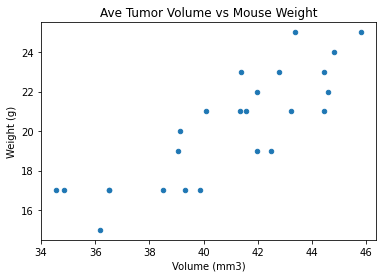

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo2_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),:]
capo3_df = capo2_df.groupby(['Mouse ID'])

volu = capo3_df['Tumor Volume (mm3)'].mean()
weight = capo3_df['Weight (g)'].mean()
scatplot = pd.DataFrame({"Volume":volu,"Weight":weight})
scatplot.plot(kind="scatter", x="Volume",y="Weight")
plt.title("Ave Tumor Volume vs Mouse Weight")
plt.xlabel("Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [20]:
correlation = st.pearsonr(volu,weight)
correlation = round(correlation[0],2)
print(f"The correlation coefficient is {correlation}")

The correlation coefficient is 0.84


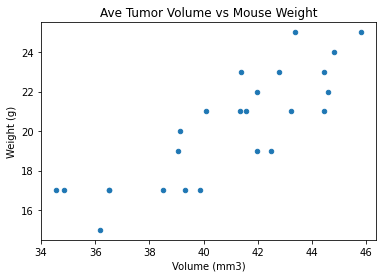

In [21]:
scatplot.plot(kind="scatter", x="Volume",y="Weight")
plt.title("Ave Tumor Volume vs Mouse Weight")
plt.xlabel("Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

The r-squared is: 0.7088568047708717


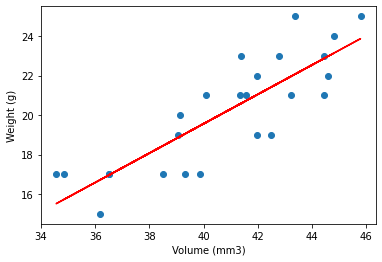

In [22]:
x_values = volu
y_values = weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Volume (mm3)")
plt.ylabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


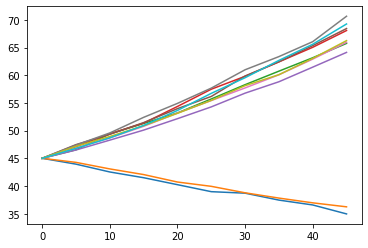

In [74]:
#Graph of drug
drug_reg_list = clean_df['Drug Regimen'].unique().tolist()
print(drug_reg_list)
for drug in drug_reg_list:
    drug_group = clean_df.loc[(clean_df["Drug Regimen"] == drug),:]
    drug_group = drug_group.groupby(['Timepoint'])
    tum_ave=drug_group['Tumor Volume (mm3)'].mean()
    wei_ave=drug_group['Weight (g)'].mean()
    sumframe = pd.DataFrame({"Tumor":tum_ave,"Weight":wei_ave})
    plt.plot(sumframe.index,sumframe['Tumor'])
    
plt.show()

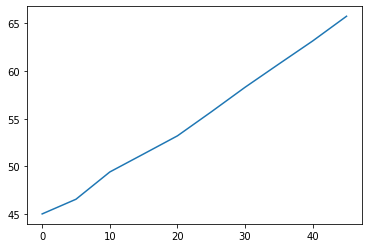

In [77]:
drug = "Infubinol"
drug_group = clean_df.loc[(clean_df["Drug Regimen"] == drug),:]
drug_group = drug_group.groupby(['Timepoint'])
tum_ave=drug_group['Tumor Volume (mm3)'].mean()
wei_ave=drug_group['Weight (g)'].mean()
sumframe = pd.DataFrame({"Tumor":tum_ave,"Weight":wei_ave})
plt.plot(sumframe.index,sumframe['Tumor'])
    
plt.show()